In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [7]:
# Data exploration
print("Dataset overview:")
print(X.describe())

print("Dataset head:")
print(X.head())


print("Dataset tail:")
print(X.tail())

Dataset overview:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741 

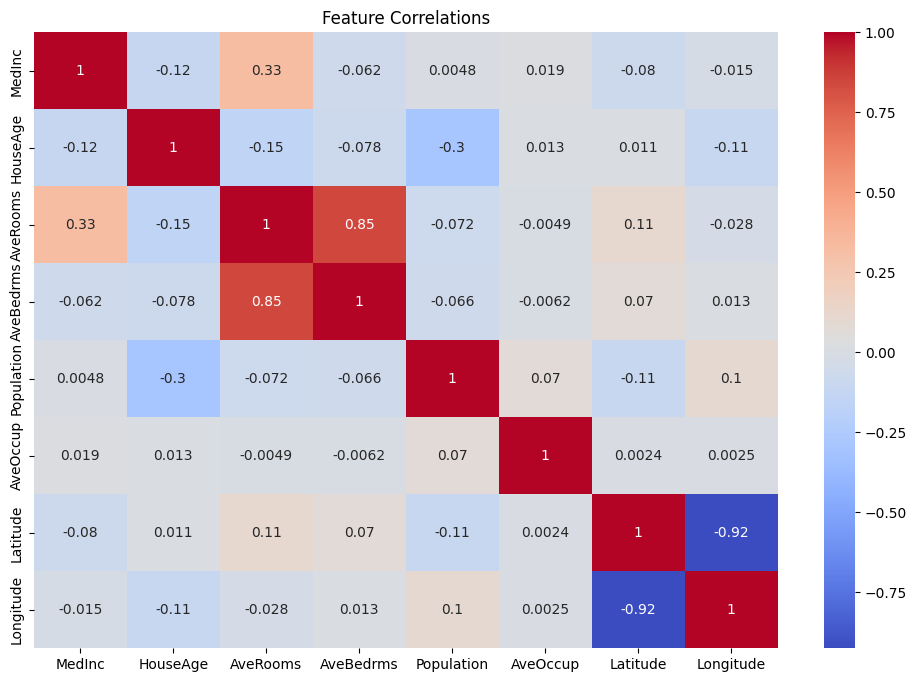

In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Function to evaluate models
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    return model_name, mse, r2, mae

In [11]:
# Baseline model: Linear Regression
baseline_model = LinearRegression()
baseline_results = evaluate_model(baseline_model, "Linear Regression", X_train_scaled, X_test_scaled, y_train, y_test)



Linear Regression Performance:
MSE: 0.5559
R² Score: 0.5758
MAE: 0.5332


In [12]:
# Model 1: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_results = evaluate_model(ridge_model, "Ridge Regression", X_train_scaled, X_test_scaled, y_train, y_test)



Ridge Regression Performance:
MSE: 0.5559
R² Score: 0.5758
MAE: 0.5332


In [13]:
# Model 2: Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_results = evaluate_model(lasso_model, "Lasso Regression", X_train_scaled, X_test_scaled, y_train, y_test)



Lasso Regression Performance:
MSE: 0.5483
R² Score: 0.5816
MAE: 0.5353


In [14]:
# Model 3: Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_results = evaluate_model(tree_model, "Decision Tree Regressor", X_train, X_test, y_train, y_test)



Decision Tree Regressor Performance:
MSE: 0.4155
R² Score: 0.6829
MAE: 0.4332


In [15]:
# Model 4: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_results = evaluate_model(rf_model, "Random Forest Regressor", X_train, X_test, y_train, y_test)



Random Forest Regressor Performance:
MSE: 0.2546
R² Score: 0.8057
MAE: 0.3271


In [16]:
# Model 5: Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
gbr_results = evaluate_model(gbr_model, "Gradient Boosting Regressor", X_train, X_test, y_train, y_test)



Gradient Boosting Regressor Performance:
MSE: 0.2243
R² Score: 0.8288
MAE: 0.3143


In [17]:
# Model 6: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_results = evaluate_model(xgb_model, "XGBoost Regressor", X_train, X_test, y_train, y_test)



XGBoost Regressor Performance:
MSE: 0.2249
R² Score: 0.8284
MAE: 0.3124


In [18]:
# Compare all models
results = pd.DataFrame([baseline_results, ridge_results, lasso_results, tree_results, rf_results, gbr_results, xgb_results],
                       columns=["Model", "MSE", "R²", "MAE"])

print("\nModel Comparison:")
print(results)


Model Comparison:
                         Model       MSE        R²       MAE
0            Linear Regression  0.555892  0.575788  0.533200
1             Ridge Regression  0.555855  0.575816  0.533193
2             Lasso Regression  0.548255  0.581615  0.535326
3      Decision Tree Regressor  0.415468  0.682948  0.433203
4      Random Forest Regressor  0.254592  0.805715  0.327114
5  Gradient Boosting Regressor  0.224307  0.828827  0.314340
6            XGBoost Regressor  0.224890  0.828382  0.312371


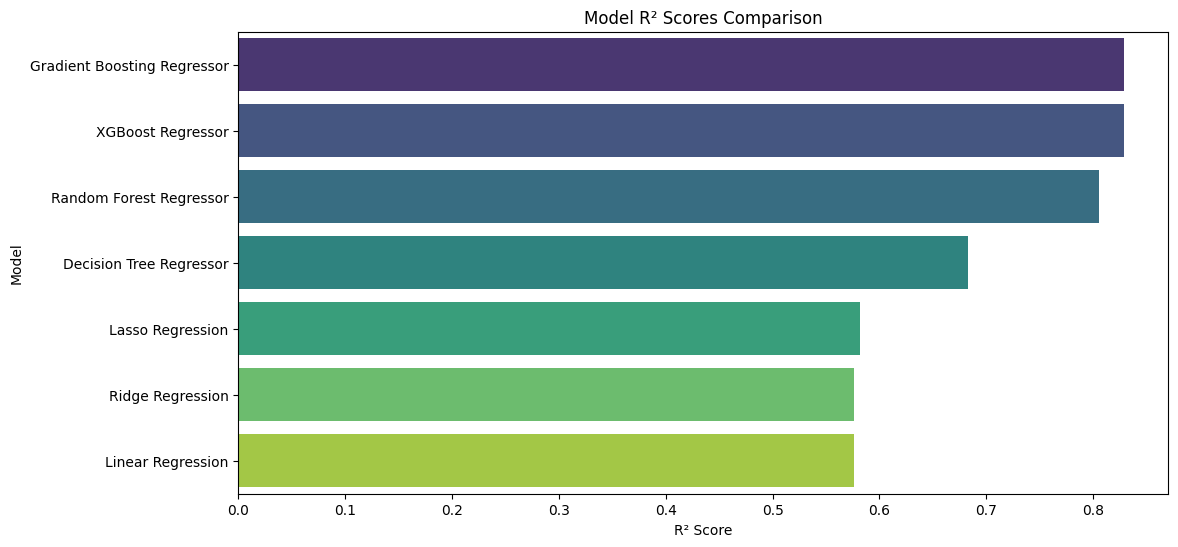

In [20]:
# Visualization of model performance
results_sorted = results.sort_values(by="R²", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x="R²", y="Model", data=results_sorted, hue="Model", dodge=False, palette="viridis")
plt.legend([],[], frameon=False)
plt.title("Model R² Scores Comparison")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()

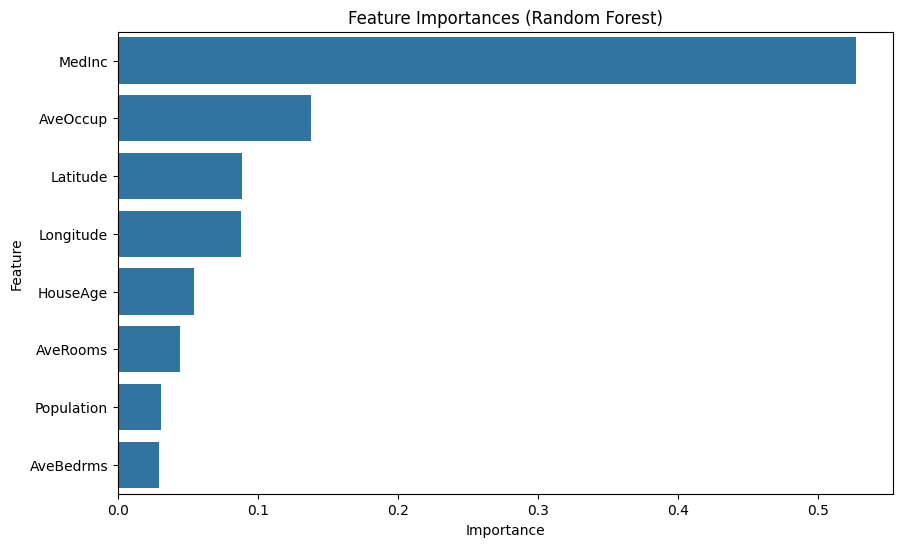

In [21]:
# Feature importance from Random Forest
feature_importance = rf_model.feature_importances_
feature_names = data.feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [23]:
import joblib

# Save the best-performing model
best_model = results_sorted.loc[results_sorted['R²'].idxmax(), 'Model']
# Get the best model name based on the highest R²

if best_model == "Random Forest Regressor":
    best_model = rf_model
elif best_model == "XGBoost Regressor":
    best_model = xgb_model
elif best_model == "Gradient Boosting Regressor":
    best_model = gbr_model
elif best_model == "Linear Regression":
    best_model = baseline_model
elif best_model == "Ridge Regression":
    best_model = ridge_model
elif best_model == "Lasso Regression":
    best_model = lasso_model
elif best_model == "Decision Tree Regressor":
    best_model = tree_model
else:
    print("No best model found or model type not recognized.")

try:
    joblib.dump(best_model, 'best_model.pkl')  # Save the model object
    print(f"The best performing model ({best_model_name}) has been saved as best_model.pkl")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

The best performing model (Gradient Boosting Regressor) has been saved as best_model.pkl
